# Library import

In [44]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# library for allowing us to read tsv file in google colab
from google.colab import drive

# Mounting drive

In [45]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the data file

In [46]:
INPUT_MAESTRO_DATA = "/content/drive/Shareddrives/CSE 291/Data/MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
variants = pd.read_csv(INPUT_MAESTRO_DATA, sep="\t", low_memory=False)

# Preprocessing

In [47]:
# PEPTIDE VARIANT TABLE
# we only need the intensities for each peptide, noted as "...intensity_for_peptide_variant"
variants_processed = variants[['Peptide'] + [c for c in variants.columns if 'intensity_for_peptide_variant' in c]]

# replace zero values (which are all intensities) in the processed matrix with N/As
variants_processed.replace(0.0, np.nan, inplace=True)

#set the index to be each Peptide
variants_processed = variants_processed.set_index('Peptide')

#transpose the matrix, so each column is a peptide
variants_processed = variants_processed.T

#only retain first two elements in the headers
variants_processed.index = variants_processed.index.map(lambda x: '.'.join(x.split('.')[:2]))

# set the condition to the first element
variants_processed['Condition'] = variants_processed.index.map(lambda x: x.split('.')[0].split('#')[1])

# only keep two conditions, for both severe and non-severe COVID-19
variants_processed = variants_processed[(variants_processed.Condition == "Healthy") | (variants_processed.Condition == "Non-severe-COVID-19")| (variants_processed.Condition == "Severe-COVID-19") 
| (variants_processed.Condition == "Symptomatic-non-COVID-19")]

# PEPTIDE VARIANT INFO TABLE
variants_info = variants[['Peptide']+['Unmodified_sequence']+['Charge']+['Top_canonical_protein']+['Canonical_proteins']]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [48]:
variants_processed.head(5)

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A",Condition
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN,Healthy
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
_dyn_#Healthy.HC17,NaN,NaN,0.286530,1.259306,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110892,0.81455,0.863862,NaN,NaN,NaN,NaN,0.791905,NaN,Healthy


# Plots and Statistical Test


## Draw histograms/plots

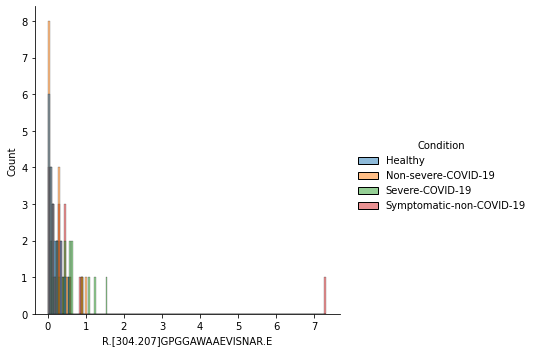

In [49]:
his_data = sns.displot(variants_processed, x='R.[304.207]GPGGAWAAEVISNAR.E', hue='Condition', binwidth=0.05)

In [50]:
his_data.data

,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A",Condition
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN,Healthy
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
_dyn_#Healthy.HC17,NaN,NaN,0.286530,1.259306,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110892,0.814550,0.863862,NaN,NaN,NaN,NaN,0.791905,NaN,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.62278,0.61363,0.020799,...,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712,Symptomatic-non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ7,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN,Symptomatic-non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ8,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN,Symptomatic-non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ9,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN,Symptomatic-non-COVID-19


## 2D plot

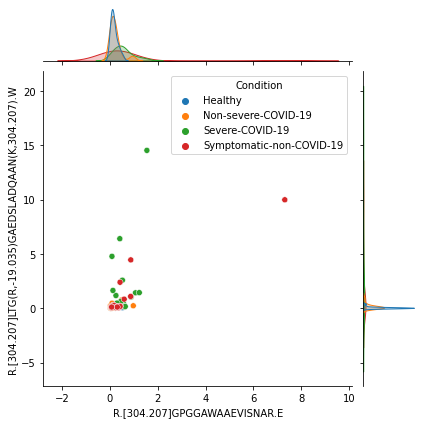

In [51]:
#use the same filtered matrix from above

sns.jointplot(x=variants_processed["R.[304.207]GPGGAWAAEVISNAR.E"],
              y=variants_processed["R.[304.207]LTG(R,-19.035)GAEDSLADQAAN(K,304.207).W"],
              hue=variants_processed['Condition'])

## Data preprocessing for heat maps

In [52]:
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        df_std[column] = df_std[column].map(lambda x: x if np.isnan(x) else min(3,max(-3,x)))
    return df_std

In [53]:
#make a copy of the matrix for further processing in the heatmap
variants_processed_for_heatmap = variants_processed.copy()
# the top 12 variants for SAA2 in COVID19
top_variants = ["R.[304.207]GPGGAWAAEVISNAR.E", "R.[304.207]LTG(R,-19.035)GAEDSLADQAAN(K,304.207).W", "A.[304.207](W,-121.748)AAEVISNAR.E", "R.[304.207](L,172.089)TGRGAEDSLADQAAN(K,304.207).W", "R.[304.207](L,285.173)TGRGAEDSLADQAAN(K,304.207).W", "R.[304.207]LTG(R,-19.032)GAEDSLADQAAN(K,304.207)WG.R", "K.[304.207]RGPGGA(W,16.001)AAEVISNAR.E", "D.[226.063]SLADQAAN(K,304.207).W", "R.{59.319}[304.207]GAEDSLADQAAN(K,304.207).W", "L.[304.207]TG(R,-19.036)GAEDSLADQAAN(K,304.207).W", "R.{60.067}[304.207]GAEDSLADQAAN(K,304.207).W", "R.[304.207]LTG(R,37.986)GAEDSLADQAAN(K,304.207).W"]
variants_processed_for_heatmap = variants_processed_for_heatmap.loc[:,list(top_variants)]
# z-score transform the peptide intensities
variants_processed_for_heatmap = z_score(variants_processed_for_heatmap)
#transpose the matrix, so we can have peptides as rows
variants_processed_for_heatmap = variants_processed_for_heatmap.T
variants_processed_for_heatmap

,_dyn_#Healthy.HC1,_dyn_#Healthy.HC10,_dyn_#Healthy.HC12,_dyn_#Healthy.HC13,_dyn_#Healthy.HC17,_dyn_#Healthy.HC19,_dyn_#Healthy.HC2,_dyn_#Healthy.HC20,_dyn_#Healthy.HC22,_dyn_#Healthy.HC23,...,_dyn_#Symptomatic-non-COVID-19.JBDZ24,_dyn_#Symptomatic-non-COVID-19.JBDZ25,_dyn_#Symptomatic-non-COVID-19.JBDZ3,_dyn_#Symptomatic-non-COVID-19.JBDZ4,_dyn_#Symptomatic-non-COVID-19.JBDZ5,_dyn_#Symptomatic-non-COVID-19.JBDZ6,_dyn_#Symptomatic-non-COVID-19.JBDZ7,_dyn_#Symptomatic-non-COVID-19.JBDZ8,_dyn_#Symptomatic-non-COVID-19.JBDZ9,_dyn_#Symptomatic-non-COVID-19.Patient-group-jbdz
Peptide,,,,,,,,,,,,,,,,,,,,,
R.[304.207]GPGGAWAAEVISNAR.E,-0.134545,-0.407572,-0.440885,-0.442496,-0.300026,0.058646,-0.066921,-0.246075,-0.313912,-0.272628,...,-0.009161,-0.020687,0.616018,-0.431223,-0.381947,-0.380278,-0.083003,0.064130,-0.082694,-0.377704
"R.[304.207]LTG(R,-19.035)GAEDSLADQAAN(K,304.207).W",-0.347619,-0.316035,-0.307914,-0.348334,-0.337424,-0.158206,-0.310926,-0.315944,-0.331457,-0.339597,...,-0.334097,-0.325396,0.164332,NaN,-0.311581,-0.337160,-0.287189,-0.277831,-0.305363,-0.303944
"A.[304.207](W,-121.748)AAEVISNAR.E",NaN,-0.507939,-0.646667,-0.563356,-0.400191,-0.402910,NaN,-0.498421,-0.504027,-0.506759,...,-0.308120,-0.307245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.418971
"R.[304.207](L,172.089)TGRGAEDSLADQAAN(K,304.207).W",-0.500932,NaN,NaN,NaN,-0.580504,-0.455714,-0.163554,-0.472547,NaN,NaN,...,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"R.[304.207](L,285.173)TGRGAEDSLADQAAN(K,304.207).W",-0.296432,-0.310306,NaN,-0.310887,-0.301036,-0.279498,-0.273455,-0.306207,-0.295243,-0.299969,...,-0.270069,-0.275343,-0.042284,NaN,-0.306139,-0.309972,-0.205093,-0.169992,-0.227980,-0.222015
"R.[304.207]LTG(R,-19.032)GAEDSLADQAAN(K,304.207)WG.R",NaN,NaN,NaN,NaN,-0.275749,-0.329152,NaN,-0.416072,-0.460820,-0.358081,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.340329,-0.247640,-0.284370,-0.372542
"K.[304.207]RGPGGA(W,16.001)AAEVISNAR.E",-0.776461,0.194426,-0.425480,-0.257852,NaN,NaN,-0.491347,NaN,-0.039895,0.148667,...,0.287371,0.382854,0.551323,NaN,NaN,NaN,-0.435294,-0.374774,-0.489603,0.161877
"D.[226.063]SLADQAAN(K,304.207).W",NaN,-0.504984,-0.747099,-0.277160,-0.184451,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.389180,0.399944,0.214528,0.197281
"R.{59.319}[304.207]GAEDSLADQAAN(K,304.207).W",-0.328174,-0.232547,-0.294016,-0.288518,NaN,-0.139316,-0.269588,-0.241732,-0.329797,-0.324378,...,-0.239749,-0.228922,-0.013143,NaN,NaN,NaN,-0.315000,-0.292622,-0.309016,-0.316587


## Draw the heat map for the top 12 variants

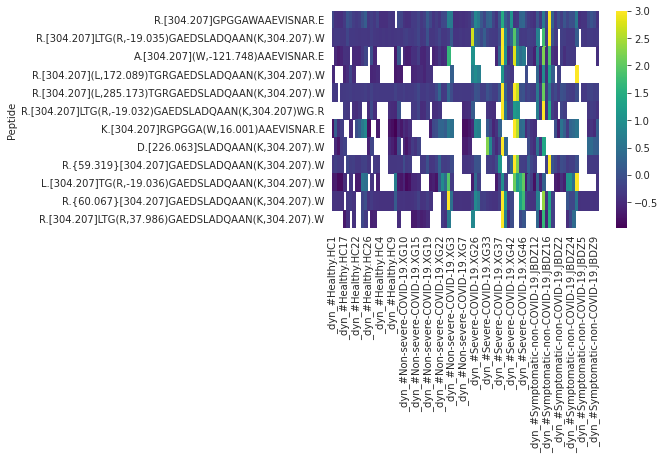

In [54]:
cmap = sns.color_palette("viridis", as_cmap=True)
with sns.axes_style("white"):
    sns.heatmap(variants_processed_for_heatmap, cmap=cmap)

## Statistical tests

In [55]:
severe_intensities = variants_processed["R.[304.207]GPGGAWAAEVISNAR.E"][variants_processed.Condition == "Severe-COVID-19"].dropna()
non_severe_intensities = variants_processed["R.[304.207]GPGGAWAAEVISNAR.E"][variants_processed.Condition == "Non-severe-COVID-19"].dropna()
print("T-test:", stats.ttest_ind(severe_intensities, non_severe_intensities, equal_var = False))
print("Mann-Whitney rank test:", stats.mannwhitneyu(severe_intensities, non_severe_intensities, alternative = 'two-sided'))

T-test: Ttest_indResult(statistic=3.2417283217796866, pvalue=0.003249604165758084)
Mann-Whitney rank test: MannwhitneyuResult(statistic=363.0, pvalue=0.0007117410518086113)


# Machine Learning Implementation

## Import Packages

In [56]:
# scikit-learn imports
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.metrics import recall_score, precision_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
# feature selection
from sklearn.feature_selection import SelectFpr, SelectFdr, SelectFwe, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
# tensorflow or pytorch imports

## Pick which dataset to look at and initial data preprocessing

In [57]:
#change these variables, cannot do as a function
conditions = []#, 'Symptomatic-non-COVID-19'] # which conditions do we want?
perc = 25.0 # delete columns containing perc% or more than perc% NaN values

variants_subset = variants_processed.copy()
# get only the conditions we are trying to classify
if conditions != []:
  variants_subset = variants_processed[variants_processed['Condition'].isin(conditions)]

# get only peptides with less than perc% NaN values
min_count = int(((100-perc)/100)*variants_subset.shape[0])
variants_subset = variants_subset.dropna(axis = 1, thresh = min_count)
print(variants_subset.shape)

(90, 22995)


## Initial Data Preprocessing

In [58]:
X = variants_subset.drop(columns = ['Condition'])
Y = variants_subset['Condition'].values

## Imputing data

In [59]:
## refer: https://scikit-learn.org/stable/modules/impute.html#impute
# refer: https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#plot-the-results
# baseline
X_baseline = X
X_columns = X.columns
print('Missing: %d' %sum(X.isnull().sum()))
# constant
imputer1 = SimpleImputer(missing_values= np.nan, strategy='constant',fill_value=0)
imputer1 = imputer1.fit(X)
X_constant = imputer1.transform(X)
print('Missing: %d' %np.count_nonzero(np.isnan(X_constant)))
X_constant = pd.DataFrame(X_constant, columns = X_columns)
# mean
imputer2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer2 = imputer2.fit(X)
X_mean = imputer2.transform(X)
print('Missing: %d' %np.count_nonzero(np.isnan(X_mean)))
X_mean = pd.DataFrame(X_mean, columns = X_columns)
# median
imputer3 = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer3 = imputer3.fit(X)
X_median = imputer3.transform(X)
print('Missing: %d' %np.count_nonzero(np.isnan(X_median)))
X_median = pd.DataFrame(X_median, columns = X_columns)
# K-NN imputer
imputer4 = KNNImputer()
imputer4 = imputer4.fit(X)
X_KNN = imputer4.transform(X)
print('Missing: %d' %np.count_nonzero(np.isnan(X_KNN)))
X_KNN = pd.DataFrame(X_KNN, columns = X_columns)
# multivariate feature imputation - takes a long time (around 15 minutes?)
# could also use this code for more specific machine learning based imputation
# just need to pass in a regressor in the iterative imputer, have a max_iter of 1 and then get rid of the n_nearest_feature part
#standard_scaler = StandardScaler()
#X_baseline_ss = standard_scaler.fit_transform(X_baseline)
#imputer5 = IterativeImputer(random_state = 0, max_iter = 5, tol = 0.1, n_nearest_features = 25)
#imputer5 = imputer5.fit(X_baseline_ss)
#X_II = imputer5.transform(X_baseline_ss)
#print('Missing: %d' %np.count_nonzero(np.isnan(X_II)))

Missing: 180850
Missing: 0
Missing: 0
Missing: 0
Missing: 0


In [60]:
display(X_KNN)

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)L(A,304.58)(K,304.207).L","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.{42.995}[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","D.[304.207](C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]SET(K,304.207)DLLFRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,199.1199).L",...,"K.[304.207](Y,291.172)LGEEYV(K,304.207).A","K.[304.207]YLGEEY(V,128.488)(K,304.207).A","K.{101.467}[304.207]YLGEEYV(K,304.207).A","K.{52.915}[304.207]YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,31.996)YV(K,304.207).A","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YLGE(E,14.998)YV(K,304.207).A","K.[304.207]YL(G,13.987)EEYV(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A"
0,0.101284,0.216967,1.352256,0.272530,0.161400,0.554441,0.346028,0.028262,0.829766,0.345573,...,2.511289,0.340883,0.101853,0.558244,0.276885,0.923967,0.089547,0.205740,0.402553,0.575944
1,0.211214,0.363364,0.366582,0.296847,0.538968,0.145277,0.698719,0.264383,0.429643,0.833462,...,2.440212,0.475301,0.258979,0.983455,0.155337,1.479605,0.081366,0.295649,0.362402,0.390485
2,0.094757,0.186834,0.174988,0.147994,0.318642,0.120401,0.368368,0.131448,0.219660,0.380028,...,0.322131,0.204216,0.123204,0.501524,0.119608,0.704451,0.049233,0.148002,0.168630,0.196612
3,0.128179,0.319061,0.282839,0.277178,0.642530,0.217119,0.456504,0.091701,0.400697,0.602831,...,0.642177,0.307207,0.134065,0.649983,0.141114,0.921011,0.056836,0.217464,0.228259,0.253490
4,0.104670,0.587554,0.312750,0.932067,0.321994,1.995064,0.673502,0.315839,1.169631,0.625213,...,1.997137,0.417028,0.385166,0.990605,0.243266,0.736280,1.050719,0.236625,0.468425,0.545341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.031197,0.154918,0.218505,0.113378,0.024963,0.061476,0.306663,0.069973,0.156899,0.098702,...,0.286414,0.101920,0.061392,0.210421,0.050105,0.298737,0.099513,0.073428,0.207698,0.273002
86,0.063094,0.220926,0.168100,0.156081,0.070387,0.122240,0.259678,0.083379,0.101725,0.226129,...,0.232711,0.038390,0.072588,0.209398,0.121705,0.302147,0.106666,0.069454,0.089960,0.092086
87,0.067680,0.220926,0.249860,0.257619,0.145542,0.163375,0.392055,0.083379,0.182203,0.226129,...,0.281422,0.068202,0.108039,0.360445,0.168067,0.520954,0.179845,0.135149,0.164750,0.173815
88,0.095905,0.220926,0.319936,0.271392,0.154095,0.112807,0.380603,0.083379,0.174026,0.226129,...,0.402149,0.060297,0.110488,0.391418,0.198690,0.515378,0.190297,0.132960,0.155510,0.164673


In [61]:
X_mean == X_median

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)L(A,304.58)(K,304.207).L","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.{42.995}[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","D.[304.207](C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]SET(K,304.207)DLLFRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,199.1199).L",...,"K.[304.207](Y,291.172)LGEEYV(K,304.207).A","K.[304.207]YLGEEY(V,128.488)(K,304.207).A","K.{101.467}[304.207]YLGEEYV(K,304.207).A","K.{52.915}[304.207]YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,31.996)YV(K,304.207).A","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YLGE(E,14.998)YV(K,304.207).A","K.[304.207]YL(G,13.987)EEYV(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A"
0,True,False,True,True,True,True,False,True,True,False,...,True,True,False,True,True,True,False,True,True,True
1,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
2,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
3,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,False,True,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,True,True,True,True,True,True,False,True,True,True,...,False,True,True,True,True,True,False,True,True,True
86,True,False,True,True,True,True,True,False,True,False,...,True,True,True,True,True,True,True,True,True,True
87,True,False,True,True,True,True,True,False,True,False,...,True,True,True,True,True,True,True,True,True,True
88,True,False,True,True,True,True,True,False,True,False,...,True,True,True,True,True,True,True,True,True,True


## Feature Selection

In [62]:
# refer: https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection
# which imputed dataset to use

def generateFeatureVectors(dataset):

  X_used = dataset
  print('Remaining Features after drop: %d' %X_used.shape[1])

  ################################
  # UNIVARIATE FEATURE SELECTION #
  ################################

  # can't use mutual_info_classif but might be needed to identify non-linear relationships
  # f_classif can only identify linear relationships
  #  SelectFpr
  S_Fpr = SelectFpr(f_classif, alpha = 0.05)
  X_Fpr = S_Fpr.fit_transform(X_used, Y)
  print('Remaining Features after feature selection using FPR test: %d' %X_Fpr.shape[1])
  X_Fpr = X_used[X_used.columns[S_Fpr.get_support(indices=True)]]
  #  SelectFdr
  S_Fdr = SelectFdr(f_classif, alpha = 0.05)
  X_Fdr = S_Fdr.fit_transform(X_used, Y)
  print('Remaining Features after feature selection using FDR test: %d' %X_Fdr.shape[1])
  X_Fdr = X_used[X_used.columns[S_Fdr.get_support(indices=True)]]
  #  SelectFwe
  S_Fwe = SelectFwe(f_classif, alpha = 0.05)
  X_Fwe = S_Fwe.fit_transform(X_used, Y)
  print('Remaining Features after feature selection using FWE test: %d' %X_Fwe.shape[1])
  X_Fwe = X_used[X_used.columns[S_Fwe.get_support(indices=True)]]

  ########################
  # L1 FEATURE SELECTION #
  ########################

  # how to get it to converge?
  # Commented Out because taking too long
  # X_used_scaled = scale(X_used)
  # logreg = LogisticRegression(penalty='l1',solver='saga',C=1,max_iter=1000).fit(X_used_scaled,Y)
  # logreg_model = SelectFromModel(logreg,prefit=True)
  # X_used_logreg = logreg_model.transform(X_used_scaled)
  # print('Remaining Features after feature selection using logistic regression: %d' %X_used_logreg.shape[1])
  #X_used_logreg = X_used

  ##########################
  # TREE FEATURE SELECTION #
  ##########################

  clf = ExtraTreesClassifier()
  clf = clf.fit(X_used,Y)
  clf_model = SelectFromModel(clf, prefit = True)
  X_used_clf = clf_model.transform(X_used)
  X_used_clf = X_used[X_used.columns[clf_model.get_support(indices=True)]]
  print('Remaining Features after feature selection using tree: %d' %X_used_clf.shape[1])

  return (X_used, X_Fpr, X_Fdr, X_Fwe, X_used_clf)

## Feature Selection Evaluation

In [63]:
# run KNN with full dataset, no feature selection b/c feature selection would not
# be useful here


def evalFeatures(gridSearch): 
  # which datasets do we want to include?
  imputedData = {
      "ConstantImputation": X_constant,
      "MeanImputation": X_mean,
      "MedianImputation" : X_median,
      "KNN Imputation": X_KNN
    }

  # create a new knn model
  param_grid = {'n_neighbors' : np.arange(1,10)}

  print("\nFeature Selection Evaluation\n")

  # Compareing the KNN imputed data vs feature engineering techniques
  for imputation in imputedData.keys():

    print("\n\n", imputation, "\n\n")

    featVecs = generateFeatureVectors(imputedData[imputation])

    print("\n\n")

    knn_x_s = {
        imputation: featVecs[0],
        "UnivariateFPR": featVecs[1],
        "UnivariateFDR": featVecs[2],
        "UnivariateFWE": featVecs[3],
        "TreeBased": featVecs[4] 
      }

    if(gridSearch):
      for x in knn_x_s:
        # create a new knn model
        knn = KNeighborsClassifier()
        knn_gscv = GridSearchCV(knn,param_grid, cv = 10)
        knn_gscv.fit(knn_x_s[x],Y)
        print(x)
        print(knn_gscv.best_params_)
        print(knn_gscv.best_score_)
        
    else:
      for x in knn_x_s.keys():
        knn = KNeighborsClassifier(n_neighbors = 2)
        print("--",x,"--")
        #X_train, X_test, y_train, y_test = train_test_split( knn_x_s[x], Y, test_size=0.33, random_state=1)
        #knn.fit(X_train, y_train)
        cv_scores = cross_val_score(knn,knn_x_s[x], Y, cv = 10)
        cv_pred = cross_val_predict(knn,knn_x_s[x], Y, cv = 10)
        print('Accuracy:',round(np.mean(cv_scores),4))
        print('Precision:',round(precision_score(cv_pred,Y, average = 'macro'),4))
        print('Recall:',round(recall_score(cv_pred,Y, average = 'macro'),4))



 

In [64]:
# print("GRID SEARCH")
# evalFeatures(gridSearch=True)

print("\nCONSTANT EVALUATION")
evalFeatures(gridSearch=False)


CONSTANT EVALUATION

Feature Selection Evaluation



 ConstantImputation 


Remaining Features after drop: 22994
Remaining Features after feature selection using FPR test: 951
Remaining Features after feature selection using FDR test: 65
Remaining Features after feature selection using FWE test: 21


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Remaining Features after feature selection using tree: 2630



-- ConstantImputation --
Accuracy: 0.4556
Precision: 0.4423
Recall: 0.3424
-- UnivariateFPR --
Accuracy: 0.6556
Precision: 0.6589
Recall: 0.6825
-- UnivariateFDR --
Accuracy: 0.5556
Precision: 0.5492
Recall: 0.5318
-- UnivariateFWE --
Accuracy: 0.5333
Precision: 0.5254
Recall: 0.5089
-- TreeBased --
Accuracy: 0.5333
Precision: 0.524
Recall: 0.5585


 MeanImputation 


Remaining Features after drop: 22994
Remaining Features after feature selection using FPR test: 1121
Remaining Features after feature selection using FDR test: 126
Remaining Features after feature selection using FWE test: 29


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Remaining Features after feature selection using tree: 2645



-- MeanImputation --
Accuracy: 0.4556
Precision: 0.4462
Recall: 0.3612
-- UnivariateFPR --
Accuracy: 0.6444
Precision: 0.6333
Recall: 0.6514
-- UnivariateFDR --
Accuracy: 0.5889
Precision: 0.5754
Recall: 0.5699
-- UnivariateFWE --
Accuracy: 0.5444
Precision: 0.5457
Recall: 0.5253
-- TreeBased --
Accuracy: 0.5556
Precision: 0.5467
Recall: 0.5113


 MedianImputation 


Remaining Features after drop: 22994
Remaining Features after feature selection using FPR test: 1111
Remaining Features after feature selection using FDR test: 120
Remaining Features after feature selection using FWE test: 29


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Remaining Features after feature selection using tree: 2660



-- MedianImputation --
Accuracy: 0.4667
Precision: 0.4562
Recall: 0.3662
-- UnivariateFPR --
Accuracy: 0.6778
Precision: 0.6711
Recall: 0.6846
-- UnivariateFDR --
Accuracy: 0.5444
Precision: 0.5406
Recall: 0.5156
-- UnivariateFWE --
Accuracy: 0.5222
Precision: 0.5192
Recall: 0.4637
-- TreeBased --
Accuracy: 0.6111
Precision: 0.6084
Recall: 0.6229


 KNN Imputation 


Remaining Features after drop: 22994
Remaining Features after feature selection using FPR test: 1199
Remaining Features after feature selection using FDR test: 138
Remaining Features after feature selection using FWE test: 31


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Remaining Features after feature selection using tree: 2611



-- KNN Imputation --
Accuracy: 0.4333
Precision: 0.4145
Recall: 0.2442
-- UnivariateFPR --
Accuracy: 0.7
Precision: 0.6911
Recall: 0.7311
-- UnivariateFDR --
Accuracy: 0.5333
Precision: 0.5306
Recall: 0.497
-- UnivariateFWE --
Accuracy: 0.5667
Precision: 0.5579
Recall: 0.5511
-- TreeBased --
Accuracy: 0.6
Precision: 0.5997
Recall: 0.589


## Model Implementation

### KNN Classifier

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [66]:
X_dat = generateFeatureVectors(X_KNN)[1]
Y_dat = Y

param_grid = {'n_neighbors' : np.arange(1,10), 'p': np.array([1,2]), 'weights': np.array(['uniform', 'distance'])}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn,param_grid, cv = 10)
knn_gscv.fit(X_dat,Y_dat)
  
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

# only use grid search to find the parameters: 


Remaining Features after drop: 22994
Remaining Features after feature selection using FPR test: 1199
Remaining Features after feature selection using FDR test: 138
Remaining Features after feature selection using FWE test: 31


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Remaining Features after feature selection using tree: 2601
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.7444444444444444


Accuracy: 0.744 (0.132)
Precision: 0.7259
Recall: 0.7297


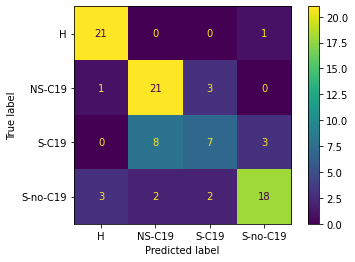

In [67]:
knn = KNeighborsClassifier(
    n_neighbors = knn_gscv.best_params_['n_neighbors'],
    p=knn_gscv.best_params_['p'],
    weights=knn_gscv.best_params_['weights']
  )

cv_scores = cross_val_score(knn,X_dat, Y_dat, cv = 10)
cv_pred = cross_val_predict(knn,X_dat, Y_dat, cv = 10)
print('Accuracy: %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))
print('Precision:',round(precision_score(cv_pred,Y_dat, average = 'macro'),4))
print('Recall:',round(recall_score(cv_pred,Y_dat, average = 'macro'),4))

ConfusionMatrixDisplay.from_predictions(Y_dat, cv_pred, display_labels = ['H','NS-C19','S-C19','S-no-C19'])

# X_train, X_test, y_train, y_test = train_test_split( X_dat, Y_dat, test_size=0.25, random_state=1)
# knn.fit(X_train, y_train)

# print(knn.score(X_test, y_test))


### Multinomial Logistical Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#### Multinomial Logistical Regression

In [ ]:
X_dat_scaled = scale(X_dat)

In [ ]:
lr_grid = {'C' : [0.01,0.1,1,10,100], 'solver' : np.array(['liblinear','newton-cg','lbfgs','sag','saga']), 'tol': np.array([1e-8,1e-6,1e-4]),'max_iter' : np.array([1000])}
lr = LogisticRegression()
lr_gscv = GridSearchCV(lr,lr_grid,cv=10)
lr_gscv.fit(X_dat_scaled,Y_dat)

print(lr_gscv.best_params_)
print(lr_gscv.best_score_)

Accuracy: 0.844 (0.142)
Precision: 0.8314
Recall: 0.8383


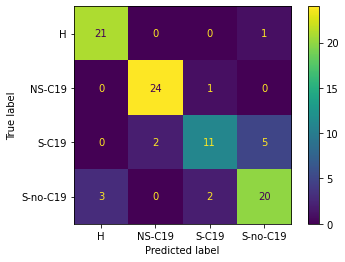

In [68]:
#logreg_gscv = LogisticRegression(C = lr_gscv.best_params_['C'], solver = lr_gscv.best_params_['solver'],max_iter=lr_gscv.best_params_['max_iter'],tol=1e-4)
logreg_gscv = LogisticRegression(C = 0.01, solver = 'newton-cg',max_iter=2000,tol=1e-6)
logreg_gscv_scores = cross_val_score(logreg_gscv, X_dat_scaled, Y_dat, cv = 10)
logreg_gscv_pred = cross_val_predict(logreg_gscv, X_dat_scaled,Y_dat, cv = 10)
print('Accuracy: %.3f (%.3f)' % (np.mean(logreg_gscv_scores), np.std(logreg_gscv_scores)))
print('Precision:',round(precision_score(logreg_gscv_pred,Y_dat, average = 'macro'),4))
print('Recall:',round(recall_score(logreg_gscv_pred,Y_dat, average = 'macro'),4))

ConfusionMatrixDisplay.from_predictions(Y_dat, logreg_gscv_pred, display_labels = ['H','NS-C19','S-C19','S-no-C19'])

Accuracy: 0.822 (0.113)
Precision: 0.8231
Recall: 0.8218


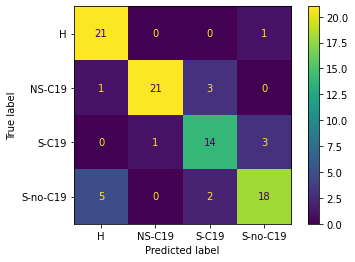

In [ ]:
logreg = LogisticRegression(random_state = 0, multi_class = 'multinomial', penalty = 'l2', solver = 'sag',max_iter = 1000)
logreg_scores = cross_val_score(logreg, X_dat_scaled, Y_dat, cv = 10)
logreg_pred = cross_val_predict(logreg, X_dat_scaled,Y_dat, cv = 10)
print('Accuracy: %.3f (%.3f)' % (np.mean(logreg_scores), np.std(logreg_scores)))
print('Precision:',round(precision_score(logreg_pred,Y_dat, average = 'macro'),4))
print('Recall:',round(recall_score(logreg_pred,Y_dat, average = 'macro'),4))

ConfusionMatrixDisplay.from_predictions(Y_dat, logreg_pred, display_labels = ['H','NS-C19','S-C19','S-no-C19'])

In [ ]:
logreg = LogisticRegression(random_state = 0, multi_class = 'multinomial', penalty = 'l2', solver = 'sag',max_iter = 1000).fit(X_dat_scaled, Y_dat)
logreg.coef_

array([[ 0.00865946,  0.04108163,  0.02133661, ..., -0.00118064,
         0.01221188,  0.01827802],
       [ 0.00641818,  0.00582897,  0.00732767, ...,  0.01960584,
         0.05914338, -0.00610892],
       [ 0.01202861, -0.01326935, -0.0067786 , ...,  0.00375019,
        -0.0244163 , -0.00924757],
       [-0.02710625, -0.03364125, -0.02188568, ..., -0.02217539,
        -0.04693896, -0.00292152]])

#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(),svc_param_grid,refit = True, cv=10)
svc_grid.fit(X_dat_scaled,Y_dat)
print(svc_grid.best_params_)
print(svc_grid.best_score_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.8


Accuracy: 0.800 (0.120)
Precision: 0.7914
Recall: 0.7929


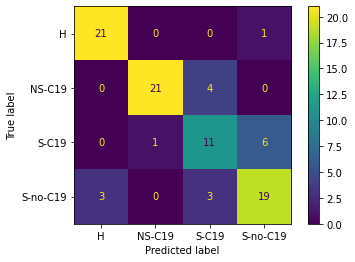

In [ ]:
svc_model = SVC(C = svc_grid.best_params_['C'], gamma = svc_grid.best_params_['gamma'], kernel= svc_grid.best_params_['kernel'])
svc_scores = cross_val_score(svc_model,X_dat_scaled,Y_dat,cv = 10)
svc_pred = cross_val_predict(svc_model, X_dat_scaled,Y_dat, cv = 10)
print('Accuracy: %.3f (%.3f)' % (np.mean(svc_scores), np.std(svc_scores)))
print('Precision:',round(precision_score(svc_pred,Y_dat, average = 'macro'),4))
print('Recall:',round(recall_score(svc_pred,Y_dat, average = 'macro'),4))

ConfusionMatrixDisplay.from_predictions(Y_dat, svc_pred, display_labels = ['H','NS-C19','S-C19','S-no-C19'])

#### Neural Network Implementation

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn_param_grid = {'hidden_layer_sizes' : [(256),(256,256),(256,256,256)],
                 'solver' : ['lbfgs']}

nn_grid = GridSearchCV(MLPClassifier(),nn_param_grid,refit = True, cv=10)
nn_grid.fit(X_dat_scaled,Y_dat)
print(nn_grid.best_params_)
print(nn_grid.best_score_)

{'hidden_layer_sizes': (256, 256), 'solver': 'lbfgs'}
0.8111111111111111


Accuracy: 0.789 (0.136)
Precision: 0.7978
Recall: 0.797


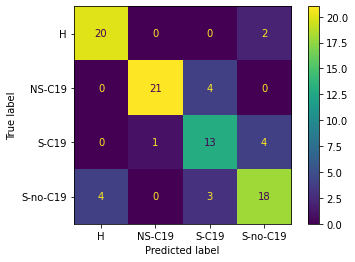

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=nn_grid.best_params_['hidden_layer_sizes'],solver = 'lbfgs')
nn_scores = cross_val_score(nn_model,X_dat_scaled,Y_dat,cv = 10)
nn_pred = cross_val_predict(nn_model, X_dat_scaled,Y_dat, cv = 10)
print('Accuracy: %.3f (%.3f)' % (np.mean(nn_scores), np.std(nn_scores)))
print('Precision:',round(precision_score(nn_pred,Y_dat, average = 'macro'),4))
print('Recall:',round(recall_score(nn_pred,Y_dat, average = 'macro'),4))

ConfusionMatrixDisplay.from_predictions(Y_dat, nn_pred, display_labels = ['H','NS-C19','S-C19','S-no-C19'])

# Save data for Stage 2 analysis

In [ ]:
# save the following data from the stage 1 analysis

#data drop
drop_path = "/content/drive/Shareddrives/CSE 291/Results/X_drop.csv"
with open(drop_path, 'w', encoding = 'utf-8-sig') as i:
  X.to_csv(i)

#imputed only data
imputed_path = "/content/drive/Shareddrives/CSE 291/Results/X_KNN.csv"
with open(imputed_path, 'w', encoding = 'utf-8-sig') as i:
  X_KNN.to_csv(i)

# the imputed and feature selected dataset
dataset_path = "/content/drive/Shareddrives/CSE 291/Results/final_dataset.csv"
final_dataset = X_dat
final_dataset['Condition'] = Y
with open(dataset_path, 'w', encoding = 'utf-8-sig') as f:
  final_dataset.to_csv(f)

# the info regarding each peptide
variants_info_path = "/content/drive/Shareddrives/CSE 291/Results/variants_info.csv"
with open(variants_info_path, 'w', encoding = 'utf-8-sig') as v:
  variants_info.to_csv(v)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
